| **Inicio** | **atrás 3** |
|----------- |-------------- |
| [🏠](../../../README.md) | [⏪](./3.ESTIMACION_DE_PARAMETROS_POBLACIONALES.ipynb)|

# **4. PRUEBAS DE HIPÓTESIS**

## **Sistema de hipótesis**

El sistema de hipótesis, también conocido como el enfoque de pruebas de hipótesis, es un método estadístico utilizado para tomar decisiones basadas en evidencia de una muestra de datos. Consiste en formular dos hipótesis mutuamente excluyentes: la hipótesis nula $(H0)$ y la hipótesis alternativa $(H1)$, y luego realizar pruebas estadísticas para determinar qué hipótesis es más probable dada la evidencia observada en los datos.

A continuación, te proporcionaré una explicación detallada del sistema de hipótesis junto con un ejemplo en código Python y una gráfica correspondiente.

El sistema de hipótesis se compone de los siguientes pasos:

1. **Formulación de hipótesis:**

* **Hipótesis nula (H0):** Es la hipótesis que asume que no hay efecto o diferencia real en los datos. Se representa como una igualdad, una proporción o una diferencia igual a cero.
* **Hipótesis alternativa (H1):** Es la hipótesis que afirma que hay una diferencia o efecto real en los datos. Puede ser una hipótesis de dos colas (diferente de cero) o una hipótesis de una cola (mayor que cero o menor que cero).

2. **Selección del nivel de significancia:**

El nivel de significancia $(α)$ es la probabilidad máxima aceptada de cometer un error de tipo $I$, que es rechazar incorrectamente la hipótesis nula cuando es verdadera. Es comúnmente seleccionado como `0.05` o `0.01`, lo que indica un `5%` o `1%` de probabilidad de error.

3. **Realización de la prueba estadística:**

Se aplica una prueba estadística adecuada para la situación y los datos. Esto implica calcular un estadístico de prueba basado en la muestra y determinar su distribución bajo la hipótesis nula.

4. **Toma de decisión:**

Se compara el valor del estadístico de prueba con un valor crítico o se calcula un valor $p$, que representa la probabilidad de observar un resultado tan extremo o más extremo que el observado, asumiendo que la hipótesis nula es verdadera. Si el valor del estadístico de prueba está en la región de rechazo (valor crítico) o el valor $p$ es menor que el nivel de significancia seleccionado, se rechaza la hipótesis nula y se acepta la hipótesis alternativa.

Ejemplo de código en Python para realizar una prueba de hipótesis para la media poblacional:

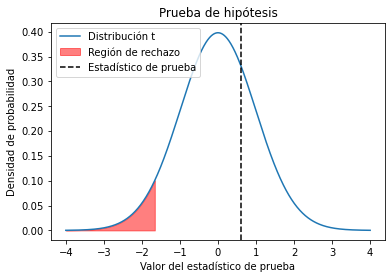

No se rechaza la hipótesis nula


In [2]:
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt

# Muestra de datos
np.random.seed(0)
muestra = np.random.normal(loc=2, scale=1, size=100)

# Hipótesis nula y alternativa
hipotesis_nula = 2.0
hipotesis_alternativa = 2.5

# Nivel de significancia
nivel_significancia = 0.05

# Estimaciones
media_estimada = np.mean(muestra)
error_estandar = np.std(muestra) / np.sqrt(len(muestra))

# Estadístico de prueba
estadistico_prueba = (media_estimada - hipotesis_nula) / error_estandar

# Valor crítico
valor_critico = t.ppf(1 - nivel_significancia, df=len(muestra) - 1)

# Valor p
valor_p = t.sf(np.abs(estadistico_prueba), df=len(muestra) - 1) * 2

# Gráfica de la distribución t con el estadístico de prueba
x = np.linspace(-4, 4, 1000)
y = t.pdf(x, df=len(muestra) - 1)
critico_x = np.linspace(-4, -valor_critico, 100)
critico_y = t.pdf(critico_x, df=len(muestra) - 1)

plt.plot(x, y, label='Distribución t')
plt.fill_between(critico_x, critico_y, color='red', alpha=0.5, label='Región de rechazo')
plt.axvline(estadistico_prueba, color='black', linestyle='--', label='Estadístico de prueba')
plt.legend()
plt.xlabel('Valor del estadístico de prueba')
plt.ylabel('Densidad de probabilidad')
plt.title('Prueba de hipótesis')
plt.show()

# Toma de decisión
if np.abs(estadistico_prueba) > valor_critico or valor_p < nivel_significancia:
    print("Se rechaza la hipótesis nula")
else:
    print("No se rechaza la hipótesis nula")

En este ejemplo, generamos una muestra de datos de una distribución normal con media 2 y desviación estándar 1. Formulamos una hipótesis nula de que la media poblacional es igual a 2 y una hipótesis alternativa de que la media poblacional es igual a 2.5. Realizamos una prueba de hipótesis utilizando la distribución t de Student y un nivel de significancia del 5%. Calculamos el estadístico de prueba, el valor crítico y el valor $p$. Además, graficamos la distribución t con la región de rechazo y el estadístico de prueba. Finalmente, tomamos una decisión basada en el valor del estadístico de prueba y el valor crítico o el valor $p$.

Recuerda que la interpretación de la prueba de hipótesis depende del contexto y de las suposiciones subyacentes. Es importante considerar el tamaño de la muestra, las suposiciones de la prueba y las implicaciones prácticas al interpretar los resultados.

## **Tipos de error, nivel de significación**

Los tipos de error y el nivel de significancia son conceptos fundamentales en las pruebas de hipótesis. A continuación, te proporcionaré una explicación detallada de estos conceptos junto con un ejemplo en código Python y una gráfica correspondiente.

1. **Tipos de error:**

* **Error de tipo I (α):** Ocurre cuando se rechaza la hipótesis nula $(H_0)$ cuando es verdadera. En otras palabras, se comete un error al concluir que hay evidencia suficiente para respaldar la hipótesis alternativa $(H_1)$ cuando en realidad no la hay.
* **Error de tipo II (β):** Ocurre cuando se acepta la hipótesis nula $(H_0)$ cuando es falsa. Es decir, se comete un error al no detectar una diferencia o efecto real en los datos cuando en realidad existe.

1. **Nivel de significancia (α):**

El nivel de significancia representa la probabilidad máxima que estamos dispuestos a aceptar para cometer un error de tipo $I$. Es comúnmente seleccionado como 0.05 (5%) o 0.01 (1%). Si el valor $p$ calculado en la prueba de hipótesis es menor que el nivel de significancia, se rechaza la hipótesis nula.
A continuación, se presenta un ejemplo de código en Python que ilustra los tipos de error y el nivel de significancia utilizando una prueba de hipótesis de una media poblacional:

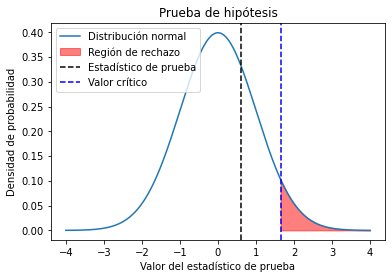

No se rechaza la hipótesis nula


In [3]:
import numpy as np
from scipy.stats import norm

# Muestra de datos
np.random.seed(0)
muestra = np.random.normal(loc=2, scale=1, size=100)

# Hipótesis nula y alternativa
hipotesis_nula = 2.0

# Estimaciones
media_estimada = np.mean(muestra)
error_estandar = np.std(muestra) / np.sqrt(len(muestra))

# Estadístico de prueba
estadistico_prueba = (media_estimada - hipotesis_nula) / error_estandar

# Nivel de significancia
nivel_significancia = 0.05

# Valor crítico
valor_critico = norm.ppf(1 - nivel_significancia)

# Gráfica de la distribución normal con el estadístico de prueba y el valor crítico
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x)
critico_x = np.linspace(valor_critico, 4, 100)
critico_y = norm.pdf(critico_x)

plt.plot(x, y, label='Distribución normal')
plt.fill_between(critico_x, critico_y, color='red', alpha=0.5, label='Región de rechazo')
plt.axvline(estadistico_prueba, color='black', linestyle='--', label='Estadístico de prueba')
plt.axvline(valor_critico, color='blue', linestyle='--', label='Valor crítico')
plt.legend()
plt.xlabel('Valor del estadístico de prueba')
plt.ylabel('Densidad de probabilidad')
plt.title('Prueba de hipótesis')
plt.show()

# Toma de decisión
if estadistico_prueba > valor_critico:
    print("Se rechaza la hipótesis nula (Error de tipo I)")
else:
    print("No se rechaza la hipótesis nula")

En este ejemplo, generamos una muestra de datos de una distribución normal con media 2 y desviación estándar 1. Formulamos una hipótesis nula de que la media poblacional es igual a 2. Realizamos una prueba de hipótesis utilizando la distribución normal y un nivel de significancia del 5%. Calculamos el estadístico de prueba y el valor crítico correspondiente. Además, graficamos la distribución normal con la región de rechazo, el estadístico de prueba y el valor crítico. Finalmente, tomamos una decisión basada en el valor del estadístico de prueba y el valor crítico, lo que puede llevar a cometer un error de tipo $I$ o no.

Recuerda que la interpretación de los resultados de la prueba de hipótesis debe hacerse con precaución, considerando tanto los tipos de error como el contexto y las suposiciones subyacentes.

![Tipos de error, nivel de significación](../img/Tipos%20de%20error.jpg "Tipos de error, nivel de significación")

## **Estadística de prueba, regla de decisión**

La estadística de prueba y la regla de decisión son conceptos fundamentales en las pruebas de hipótesis. A continuación, te proporcionaré una explicación detallada de estos conceptos junto con un ejemplo en código Python y una gráfica correspondiente.

1. **Estadística de prueba:**

La estadística de prueba es un valor calculado a partir de los datos de muestra que se utiliza para tomar una decisión en una prueba de hipótesis. La elección de la estadística de prueba depende del tipo de prueba y la pregunta de investigación. Por lo general, se selecciona una estadística de prueba que tenga una distribución conocida bajo la hipótesis nula.

2. **Regla de decisión:**

La regla de decisión es un criterio predefinido utilizado para tomar una decisión en una prueba de hipótesis. La regla de decisión se basa en comparar el valor de la estadística de prueba con un valor crítico o en calcular un valor $p$. Dependiendo de la posición de la estadística de prueba en relación con el valor crítico o el nivel de significancia seleccionado, se decide si se rechaza o no la hipótesis nula.

A continuación, se presenta un ejemplo de código en Python que ilustra la estadística de prueba y la regla de decisión utilizando una prueba de hipótesis de una media poblacional:

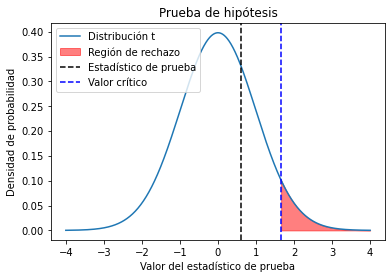

No se rechaza la hipótesis nula


In [4]:
import numpy as np
from scipy.stats import t

# Muestra de datos
np.random.seed(0)
muestra = np.random.normal(loc=2, scale=1, size=100)

# Hipótesis nula y alternativa
hipotesis_nula = 2.0

# Estimaciones
media_estimada = np.mean(muestra)
error_estandar = np.std(muestra) / np.sqrt(len(muestra))

# Estadístico de prueba
estadistico_prueba = (media_estimada - hipotesis_nula) / error_estandar

# Nivel de significancia
nivel_significancia = 0.05

# Valor crítico
valor_critico = t.ppf(1 - nivel_significancia, df=len(muestra) - 1)

# Gráfica de la distribución t con el estadístico de prueba y el valor crítico
x = np.linspace(-4, 4, 1000)
y = t.pdf(x, df=len(muestra) - 1)
critico_x = np.linspace(valor_critico, 4, 100)
critico_y = t.pdf(critico_x, df=len(muestra) - 1)

plt.plot(x, y, label='Distribución t')
plt.fill_between(critico_x, critico_y, color='red', alpha=0.5, label='Región de rechazo')
plt.axvline(estadistico_prueba, color='black', linestyle='--', label='Estadístico de prueba')
plt.axvline(valor_critico, color='blue', linestyle='--', label='Valor crítico')
plt.legend()
plt.xlabel('Valor del estadístico de prueba')
plt.ylabel('Densidad de probabilidad')
plt.title('Prueba de hipótesis')
plt.show()

# Toma de decisión
if estadistico_prueba > valor_critico:
    print("Se rechaza la hipótesis nula")
else:
    print("No se rechaza la hipótesis nula")

En este ejemplo, generamos una muestra de datos de una distribución normal con media 2 y desviación estándar 1. Formulamos una hipótesis nula de que la media poblacional es igual a 2. Realizamos una prueba de hipótesis utilizando la distribución t de Student y un nivel de significancia del 5%. Calculamos el estadístico de prueba y el valor crítico correspondiente. Además, graficamos la distribución t con la región de rechazo, el estadístico de prueba y el valor crítico. Finalmente, tomamos una decisión basada en la posición del estadístico de prueba en relación con el valor crítico.

Recuerda que la interpretación de los resultados de la prueba de hipótesis debe hacerse con precaución, considerando el contexto y las suposiciones subyacentes. La regla de decisión puede variar según el tipo de prueba y el enfoque estadístico utilizado.

![Estadística de prueba, regla de decisión](../img/regla%20de%20decisi%C3%B3n.jpg "Estadística de prueba, regla de decisión")

## **Relación entre la prueba de hipótesis y el intervalo de confianza**

La prueba de hipótesis y el intervalo de confianza son dos herramientas estadísticas relacionadas que se utilizan para obtener información sobre los parámetros de una población. A continuación, te proporcionaré una explicación detallada de la relación entre la prueba de hipótesis y el intervalo de confianza, junto con un ejemplo en código Python y una gráfica correspondiente.

La prueba de hipótesis y el intervalo de confianza están estrechamente relacionados y se basan en la estimación de un parámetro poblacional, como la media o la proporción. Ambas técnicas se utilizan para tomar decisiones sobre la hipótesis nula y proporcionan información sobre la precisión de la estimación.

1. **Prueba de hipótesis:**

La prueba de hipótesis permite evaluar si los datos de muestra proporcionan evidencia suficiente para rechazar una hipótesis nula en favor de una hipótesis alternativa. La prueba de hipótesis involucra la formulación de hipótesis nula y alternativa, la selección de un nivel de significancia y el cálculo de una estadística de prueba. Comparando la estadística de prueba con un valor crítico o calculando un valor $p$, se toma una decisión sobre la hipótesis nula.

2. **Intervalo de confianza:**

El intervalo de confianza es un rango de valores dentro del cual se estima que se encuentra el verdadero valor del parámetro poblacional con un cierto nivel de confianza. Por lo general, se establece un nivel de confianza del 95% o del 99%. El intervalo de confianza se calcula utilizando una estadística de la muestra y considerando la variabilidad de los datos.

3. **Relación entre la prueba de hipótesis y el intervalo de confianza:**

La relación entre la prueba de hipótesis y el intervalo de confianza radica en que ambos enfoques se basan en la estimación de un parámetro poblacional y utilizan información de la muestra para tomar decisiones o proporcionar estimaciones. En muchos casos, si el intervalo de confianza incluye el valor hipotetizado en la prueba de hipótesis, se llega a la misma conclusión en ambas técnicas.

A continuación, se presenta un ejemplo de código en Python que ilustra la relación entre la prueba de hipótesis y el intervalo de confianza para una media poblacional:

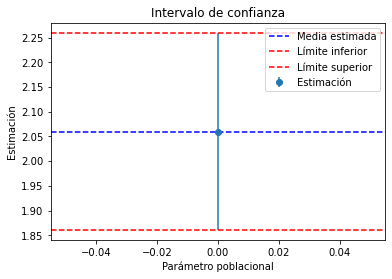

Se rechaza la hipótesis nula
Intervalo de confianza: (1.8598223120253592, 2.259793719043611)


In [5]:
import numpy as np
from scipy.stats import t

# Muestra de datos
np.random.seed(0)
muestra = np.random.normal(loc=2, scale=1, size=100)

# Estimaciones
media_estimada = np.mean(muestra)
error_estandar = np.std(muestra) / np.sqrt(len(muestra))

# Nivel de confianza
nivel_confianza = 0.95

# Intervalo de confianza
valor_critico = t.ppf(1 - (1 - nivel_confianza) / 2, df=len(muestra) - 1)
intervalo_confianza = (media_estimada - valor_critico * error_estandar,
                       media_estimada + valor_critico * error_estandar)

# Gráfica del intervalo de confianza
plt.errorbar(0, media_estimada, yerr=valor_critico * error_estandar, fmt='o', label='Estimación')
plt.axhline(media_estimada, color='blue', linestyle='--', label='Media estimada')
plt.axhline(intervalo_confianza[0], color='red', linestyle='--', label='Límite inferior')
plt.axhline(intervalo_confianza[1], color='red', linestyle='--', label='Límite superior')
plt.legend()
plt.xlabel('Parámetro poblacional')
plt.ylabel('Estimación')
plt.title('Intervalo de confianza')
plt.show()

# Prueba de hipótesis
hipotesis_nula = 2.0
estadistico_prueba = (media_estimada - hipotesis_nula) / error_estandar
valor_critico_prueba = t.ppf(1 - nivel_confianza, df=len(muestra) - 1)

# Toma de decisión
if estadistico_prueba > valor_critico_prueba:
    print("Se rechaza la hipótesis nula")
else:
    print("No se rechaza la hipótesis nula")

print("Intervalo de confianza:", intervalo_confianza)

En este ejemplo, generamos una muestra de datos de una distribución normal con media 2 y desviación estándar 1. Calculamos el intervalo de confianza del 95% para la media poblacional y graficamos el intervalo junto con la estimación de la media. Además, realizamos una prueba de hipótesis para la hipótesis nula de que la media poblacional es igual a 2 y tomamos una decisión basada en la comparación del estadístico de prueba con el valor crítico correspondiente. Observa cómo el intervalo de confianza y la decisión de la prueba de hipótesis están relacionados en este caso.

Recuerda que la interpretación de los resultados de la prueba de hipótesis y el intervalo de confianza debe hacerse con precaución, considerando el contexto y las suposiciones subyacentes. Además, la relación entre la prueba de hipótesis y el intervalo de confianza puede variar según el problema y los supuestos estadísticos utilizados.

## **Pruebas sobre la media**

Las pruebas sobre la media son técnicas estadísticas utilizadas para tomar decisiones sobre una hipótesis relacionada con la media poblacional de una distribución. Estas pruebas se aplican cuando se desea evaluar si una muestra de datos proporciona evidencia suficiente para rechazar una afirmación sobre la media poblacional. A continuación, te proporcionaré una explicación detallada de las pruebas sobre la media, junto con un ejemplo en código Python y una gráfica correspondiente.

Supongamos que tienes una muestra de datos y deseas evaluar si la media de la población a la que pertenece la muestra es igual a un valor específico o si hay alguna diferencia significativa con respecto a ese valor. Para realizar una prueba sobre la media, se sigue un proceso general que involucra la formulación de hipótesis nula y alternativa, la selección de un nivel de significancia y el cálculo de un estadístico de prueba.

A continuación se presenta un ejemplo de código en Python que ilustra una prueba sobre la media utilizando una muestra de datos y la distribución t de Student:

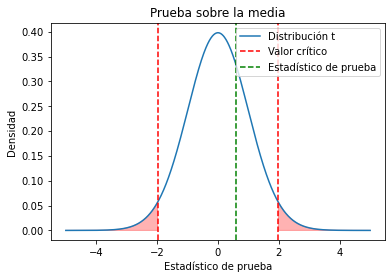

No se rechaza la hipótesis nula


In [6]:
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt

# Muestra de datos
np.random.seed(0)
muestra = np.random.normal(loc=2, scale=1, size=100)

# Estadísticas de la muestra
media_muestra = np.mean(muestra)
desviacion_estandar_muestra = np.std(muestra)
n = len(muestra)

# Hipótesis nula y alternativa
hipotesis_nula = 2.0
hipotesis_alternativa = 3.0

# Nivel de significancia
nivel_significancia = 0.05

# Cálculo del estadístico de prueba
estadistico_prueba = (media_muestra - hipotesis_nula) / (desviacion_estandar_muestra / np.sqrt(n))

# Cálculo del valor crítico
valor_critico = t.ppf(1 - nivel_significancia / 2, df=n-1)

# Región de rechazo
region_rechazo = [valor_critico, -valor_critico]

# Gráfica de la distribución t con la región de rechazo y el estadístico de prueba
x = np.linspace(-5, 5, 1000)
y = t.pdf(x, df=n-1)

plt.plot(x, y, label='Distribución t')
plt.axvline(valor_critico, color='red', linestyle='--', label='Valor crítico')
plt.axvline(-valor_critico, color='red', linestyle='--')
plt.axvline(estadistico_prueba, color='green', linestyle='--', label='Estadístico de prueba')
plt.fill_between(x, 0, y, where=(x >= region_rechazo[0]) | (x <= region_rechazo[1]), color='red', alpha=0.3)
plt.legend()
plt.xlabel('Estadístico de prueba')
plt.ylabel('Densidad')
plt.title('Prueba sobre la media')
plt.show()

# Toma de decisión
if estadistico_prueba > valor_critico or estadistico_prueba < -valor_critico:
    print("Se rechaza la hipótesis nula")
else:
    print("No se rechaza la hipótesis nula")

En este ejemplo, generamos una muestra de datos de una distribución normal con media 2 y desviación estándar 1. Luego, formulamos una hipótesis nula de que la media poblacional es igual a 2 y una hipótesis alternativa de que la media poblacional es igual a 3. Calculamos el estadístico de prueba utilizando la fórmula del estadístico t y determinamos el valor crítico correspondiente al nivel de significancia deseado. Graficamos la distribución t junto con la región de rechazo y el estadístico de prueba.

Finalmente, tomamos una decisión basada en si el estadístico de prueba cae en la región de rechazo o no. Si el estadístico de prueba está fuera de la región de rechazo, no se rechaza la hipótesis nula; de lo contrario, se rechaza la hipótesis nula y se concluye que hay una diferencia significativa con respecto a la media hipotetizada.

Recuerda que la interpretación de los resultados de una prueba sobre la media debe hacerse con precaución, considerando el contexto y las suposiciones subyacentes. Además, es importante comprender los conceptos de hipótesis nula, hipótesis alternativa, nivel de significancia y valor crítico para realizar una interpretación adecuada de los resultados de la prueba.

## **Prueba sobre la varianza**

La prueba sobre la varianza es una técnica estadística utilizada para evaluar si una muestra de datos proporciona suficiente evidencia para rechazar una afirmación sobre la varianza poblacional. Esta prueba se aplica cuando se desea determinar si la varianza de una población es igual a un valor específico o si hay alguna diferencia significativa con respecto a ese valor. A continuación, te proporcionaré una explicación detallada de la prueba sobre la varianza, junto con un ejemplo en código Python y una gráfica correspondiente.

Supongamos que tienes una muestra de datos y deseas evaluar si la varianza de la población a la que pertenece la muestra es igual a un valor específico o si hay alguna diferencia significativa con respecto a ese valor. Para realizar una prueba sobre la varianza, se sigue un proceso general que involucra la formulación de hipótesis nula y alternativa, la selección de un nivel de significancia y el cálculo de un estadístico de prueba.

A continuación se presenta un ejemplo de código en Python que ilustra una prueba sobre la varianza utilizando una muestra de datos y la distribución chi-cuadrado:

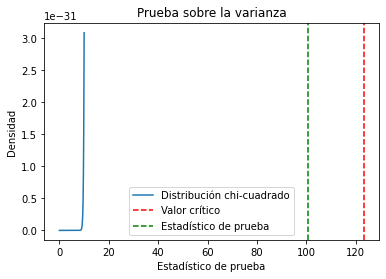

No se rechaza la hipótesis nula


In [7]:
import numpy as np
from scipy.stats import chi2
import matplotlib.pyplot as plt

# Muestra de datos
np.random.seed(0)
muestra = np.random.normal(loc=2, scale=1, size=100)

# Estadísticas de la muestra
varianza_muestra = np.var(muestra)
n = len(muestra)

# Hipótesis nula y alternativa
hipotesis_nula = 1.0
hipotesis_alternativa = 2.0

# Nivel de significancia
nivel_significancia = 0.05

# Cálculo del estadístico de prueba
estadistico_prueba = (n - 1) * varianza_muestra / hipotesis_nula

# Cálculo del valor crítico
valor_critico = chi2.ppf(1 - nivel_significancia, df=n - 1)

# Región de rechazo
region_rechazo = [valor_critico, np.inf]

# Gráfica de la distribución chi-cuadrado con la región de rechazo y el estadístico de prueba
x = np.linspace(0, 10, 1000)
y = chi2.pdf(x, df=n - 1)

plt.plot(x, y, label='Distribución chi-cuadrado')
plt.axvline(valor_critico, color='red', linestyle='--', label='Valor crítico')
plt.axvline(estadistico_prueba, color='green', linestyle='--', label='Estadístico de prueba')
plt.fill_between(x, 0, y, where=(x >= region_rechazo[0]), color='red', alpha=0.3)
plt.legend()
plt.xlabel('Estadístico de prueba')
plt.ylabel('Densidad')
plt.title('Prueba sobre la varianza')
plt.show()

# Toma de decisión
if estadistico_prueba > valor_critico:
    print("Se rechaza la hipótesis nula")
else:
    print("No se rechaza la hipótesis nula")

En este ejemplo, generamos una muestra de datos de una distribución normal con media 2 y desviación estándar 1. Luego, formulamos una hipótesis nula de que la varianza poblacional es igual a 1 y una hipótesis alternativa de que la varianza poblacional es igual a 2. Calculamos el estadístico de prueba utilizando la fórmula de la distribución chi-cuadrado y determinamos el valor crítico correspondiente al nivel de significancia deseado. Graficamos la distribución chi-cuadrado junto con la región de rechazo y el estadístico de prueba.

Finalmente, tomamos una decisión basada en si el estadístico de prueba está en la región de rechazo o no. Si el estadístico de prueba está en la región de rechazo, se rechaza la hipótesis nula y se concluye que hay una diferencia significativa con respecto a la varianza hipotetizada; de lo contrario, no se rechaza la hipótesis nula.

Recuerda que la interpretación de los resultados de una prueba sobre la varianza debe hacerse con precaución, considerando el contexto y las suposiciones subyacentes. Además, es importante comprender los conceptos de hipótesis nula, hipótesis alternativa, nivel de significancia y valor crítico para realizar una interpretación adecuada de los resultados de la prueba.

## **Prueba de la diferencia de medias**

La prueba de la diferencia de medias es una técnica estadística utilizada para evaluar si hay una diferencia significativa entre las medias de dos poblaciones o grupos distintos. Esta prueba se aplica cuando se desea determinar si las medias de dos muestras son iguales o si hay una diferencia estadísticamente significativa entre ellas. A continuación, te proporcionaré una explicación detallada de la prueba de la diferencia de medias, junto con un ejemplo en código Python y una gráfica correspondiente.

Supongamos que tienes dos muestras de datos, una de cada población o grupo que deseas comparar. El objetivo es determinar si hay suficiente evidencia para rechazar la hipótesis nula de que las medias poblacionales son iguales o si hay una diferencia significativa entre ellas. Para realizar una prueba de la diferencia de medias, se sigue un proceso general que involucra la formulación de hipótesis nula y alternativa, la selección de un nivel de significancia y el cálculo de un estadístico de prueba.

A continuación se presenta un ejemplo de código en Python que ilustra una prueba de la diferencia de medias utilizando dos muestras de datos y la distribución t de Student:

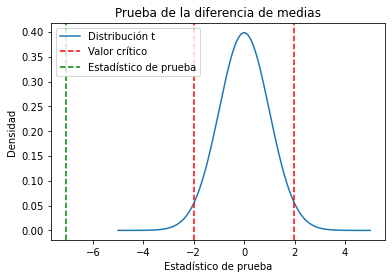

Se rechaza la hipótesis nula


In [8]:
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt

# Muestras de datos
np.random.seed(0)
muestra1 = np.random.normal(loc=2, scale=1, size=100)
muestra2 = np.random.normal(loc=3, scale=1, size=100)

# Estadísticas de las muestras
media_muestra1 = np.mean(muestra1)
media_muestra2 = np.mean(muestra2)
desviacion_estandar_muestra1 = np.std(muestra1)
desviacion_estandar_muestra2 = np.std(muestra2)
n1 = len(muestra1)
n2 = len(muestra2)

# Hipótesis nula y alternativa
hipotesis_nula = 0.0
hipotesis_alternativa = 1.0

# Nivel de significancia
nivel_significancia = 0.05

# Cálculo del estadístico de prueba
estadistico_prueba = (media_muestra1 - media_muestra2 - hipotesis_nula) / \
                     np.sqrt((desviacion_estandar_muestra1 ** 2 / n1) + (desviacion_estandar_muestra2 ** 2 / n2))

# Cálculo del valor crítico
grados_libertad = n1 + n2 - 2
valor_critico = t.ppf(1 - nivel_significancia / 2, df=grados_libertad)

# Región de rechazo
region_rechazo = [valor_critico, -valor_critico]

# Gráfica de la distribución t con la región de rechazo y el estadístico de prueba
x = np.linspace(-5, 5, 1000)
y = t.pdf(x, df=grados_libertad)

plt.plot(x, y, label='Distribución t')
plt.axvline(valor_critico, color='red', linestyle='--', label='Valor crítico')
plt.axvline(-valor_critico, color='red', linestyle='--')
plt.axvline(estadistico_prueba, color='green', linestyle='--', label='Estadístico de prueba')
plt.fill_between(x, 0, y, where=(x >= region_rechazo[0]) & (x <= region_rechazo[1]), color='red', alpha=0.3)
plt.legend()
plt.xlabel('Estadístico de prueba')
plt.ylabel('Densidad')
plt.title('Prueba de la diferencia de medias')
plt.show()

# Toma de decisión
if estadistico_prueba > valor_critico or estadistico_prueba < -valor_critico:
    print("Se rechaza la hipótesis nula")
else:
    print("No se rechaza la hipótesis nula")

En este ejemplo, generamos dos muestras de datos de distribuciones normales con medias 2 y 3, y desviaciones estándar 1 para ambas muestras. Luego, formulamos una hipótesis nula de que las medias poblacionales son iguales y una hipótesis alternativa de que hay una diferencia entre las medias poblacionales. Calculamos el estadístico de prueba utilizando la fórmula de la distribución t de Student y determinamos el valor crítico correspondiente al nivel de significancia deseado. Graficamos la distribución t junto con la región de rechazo y el estadístico de prueba.

Finalmente, tomamos una decisión basada en si el estadístico de prueba está en la región de rechazo o no. Si el estadístico de prueba está en la región de rechazo, se rechaza la hipótesis nula y se concluye que hay una diferencia significativa entre las medias; de lo contrario, no se rechaza la hipótesis nula.

Recuerda que la interpretación de los resultados de una prueba de la diferencia de medias debe hacerse con precaución, considerando el contexto y las suposiciones subyacentes. Además, es importante comprender los conceptos de hipótesis nula, hipótesis alternativa, nivel de significancia y valor crítico para realizar una interpretación adecuada de los resultados de la prueba.

## **Prueba de independencia Chi-cuadrado**

La prueba de independencia Chi-cuadrado es una técnica estadística utilizada para determinar si existe una relación significativa entre dos variables categóricas. Esta prueba se aplica cuando se desea evaluar si hay una asociación entre dos variables discretas y si los valores observados difieren significativamente de los valores esperados bajo la hipótesis nula de independencia. A continuación, te proporcionaré una explicación detallada de la prueba de independencia Chi-cuadrado, junto con un ejemplo en código Python y una gráfica correspondiente.

Supongamos que tienes una tabla de contingencia que muestra la frecuencia de ocurrencia conjunta de dos variables categóricas. El objetivo es determinar si estas dos variables son independientes o si hay una asociación significativa entre ellas. Para realizar una prueba de independencia Chi-cuadrado, se sigue un proceso general que involucra la formulación de hipótesis nula y alternativa, la selección de un nivel de significancia y el cálculo de un estadístico de prueba.

A continuación se presenta un ejemplo de código en Python que ilustra una prueba de independencia Chi-cuadrado utilizando una tabla de contingencia:

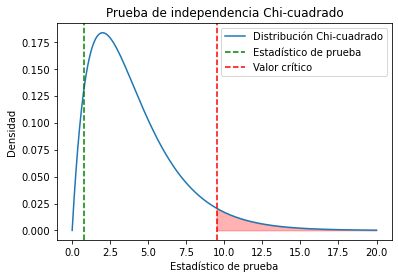

No se rechaza la hipótesis nula de independencia


In [9]:
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

# Tabla de contingencia (variables categóricas)
tabla_contingencia = np.array([[10, 20, 30],
                               [15, 25, 35],
                               [20, 30, 40]])

# Realizar la prueba de independencia Chi-cuadrado
estadistico_prueba, p_valor, grados_libertad, esperados = chi2_contingency(tabla_contingencia)

# Nivel de significancia
nivel_significancia = 0.05

# Valores críticos de la distribución chi-cuadrado
valor_critico = chi2.ppf(1 - nivel_significancia, df=grados_libertad)

# Gráfica de la distribución chi-cuadrado con el estadístico de prueba
x = np.linspace(0, 20, 1000)
y = chi2.pdf(x, df=grados_libertad)

plt.plot(x, y, label='Distribución Chi-cuadrado')
plt.axvline(estadistico_prueba, color='green', linestyle='--', label='Estadístico de prueba')
plt.axvline(valor_critico, color='red', linestyle='--', label='Valor crítico')
plt.fill_between(x, 0, y, where=(x >= valor_critico), color='red', alpha=0.3)
plt.legend()
plt.xlabel('Estadístico de prueba')
plt.ylabel('Densidad')
plt.title('Prueba de independencia Chi-cuadrado')
plt.show()

# Toma de decisión
if estadistico_prueba > valor_critico:
    print("Se rechaza la hipótesis nula de independencia")
else:
    print("No se rechaza la hipótesis nula de independencia")

En este ejemplo, se crea una tabla de contingencia con frecuencias observadas para dos variables categóricas. Luego, se utiliza la función `chi2_contingency` de la librería SciPy para realizar la prueba de independencia Chi-cuadrado. Esta función calcula el estadístico de prueba, el `p-valor`, los grados de libertad y los valores esperados bajo la hipótesis nula de independencia. Se establece un nivel de significancia deseado y se calcula el valor crítico correspondiente utilizando la distribución chi-cuadrado.

A continuación, se grafica la distribución chi-cuadrado con el estadístico de prueba y el valor crítico. Se sombrea el área correspondiente a la región de rechazo. Finalmente, se toma una decisión basada en si el estadístico de prueba está en la región de rechazo o no. Si el estadístico de prueba está en la región de rechazo, se rechaza la hipótesis nula y se concluye que hay una asociación significativa entre las variables; de lo contrario, no se rechaza la hipótesis nula.

Recuerda que la interpretación de los resultados de la prueba de independencia Chi-cuadrado debe hacerse con precaución, considerando el contexto y las suposiciones subyacentes. Además, es importante comprender los conceptos de hipótesis nula, hipótesis alternativa, nivel de significancia y valor crítico para realizar una interpretación adecuada de los resultados de la prueba.

| **Inicio** | **atrás 3** |
|----------- |-------------- |
| [🏠](../../../README.md) | [⏪](./3.ESTIMACION_DE_PARAMETROS_POBLACIONALES.ipynb)|